In [39]:
import sympy as sp

Find solution fo a 2nd order system with damping using method if averaging. The common equation in unitless form:

$$\ddot{x}+\frac{1}{Q}\dot{x}+x=a\cos{\Omega t}$$

Since the equation corresponds to a non-free vibration, consider the solution in general form:

\begin{aligned}
x&=r\cos(\Omega t + \phi) \\
 &=r\cos\phi\cdot\cos\Omega t-r\sin\phi\cdot\sin\Omega t \\
 &=u\cos\Omega t + v\sin\Omega t
\end{aligned}

where $u$ and $v$ are slowly varying in time finctions in comparioson with $\cos\Omega t$.

In [40]:
a, W, Q, t, u, v = sp.symbols('a, \Omega, Q, t, u, v')

In [41]:
x = u * sp.cos(W*t) + v * sp.sin(W*t)
dx = -W * u * sp.sin(W*t) + W * v * sp.cos(W*t)
F = -(W-1/W)*x - 1/Q * 1/W * dx + a/W*sp.cos(W*t)

In [42]:
F

(-\Omega + 1/\Omega)*(u*cos(\Omega*t) + v*sin(\Omega*t)) + a*cos(\Omega*t)/\Omega - (-\Omega*u*sin(\Omega*t) + \Omega*v*cos(\Omega*t))/(Q*\Omega)

In [43]:
T = 2*sp.pi / W

In [44]:
du = (sp.integrate(-sp.sin(W*t)*F, (t,0,T))/T).expand()
du

\Omega*v/2 - v/(2*\Omega) - u/(2*Q)

In [45]:
dv = (sp.integrate(sp.cos(W*t)*F, (t,0,T))/T).expand()
dv

-\Omega*u/2 + a/(2*\Omega) + u/(2*\Omega) - v/(2*Q)

In [46]:
sol = sp.solve((du,dv), [u,v])

Amplitude-frequency responce, for instance, can be obtained from the stationary solutiton:

In [47]:
sp.sqrt((sol[u]**2+sol[v]**2)/a**2).simplify()

sqrt(Q**2*(Q**2*(\Omega**2 - 1)**2 + \Omega**2)/(Q**2*\Omega**4 - 2*Q**2*\Omega**2 + Q**2 + \Omega**2)**2)

simplify this equation manually:

$$|K(\Omega)| = \frac{1}{\sqrt{(1-\Omega^2)^2+\frac{1}{Q^2}\Omega^2}}$$

For comparison:
$$\ddot{x}+\frac{1}{Q}\dot{x}+x=y$$
let $x=X\exp(i\Omega t)$, $y=Y\exp(i\Omega t)$, then
$$((1-\Omega^2)+\frac{1}{Q}i\Omega)X=Y$$
frerquency responce
$$K=\frac{Y}{X}=\frac{1}{(1-\Omega^2)+\frac{1}{Q}i\Omega}$$
taking the amplitude of the responce matches the same expression
$$|K| = \frac{1}{\sqrt{(1-\Omega^2)^2+\frac{1}{Q^2}\Omega^2}}$$

In [48]:
from sympy.plotting import plot

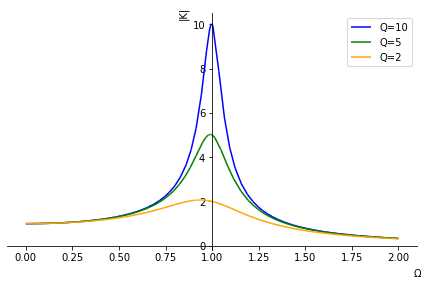

In [82]:
fig = plot(1/sp.sqrt((1-W**2)**2+W**2/100),
           1/sp.sqrt((1-W**2)**2+W**2/25),
           1/sp.sqrt((1-W**2)**2+W**2/4),
           (W,0,2),
           show=False)
fig[0].line_color='blue'
fig[1].line_color='green'
fig[2].line_color='orange'
fig[0].label='Q=10'
fig[1].label='Q=5'
fig[2].label='Q=2'
fig.axis_center = 1, 0
fig.ylabel = '|K|'
fig.xlabel = '$\Omega$'
fig.legend = True
fig.show()